**HAWAII TRIP**

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sqlalchemy import Index

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from itertools import groupby

**REFLECT TABLES INTO SQLALCHEMY ORM**

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
conn=engine.connect()

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
columns=inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
 # Create our session (link) from Python to the DB
session = Session(engine)

**EXPLORATORY CLIMATE ANALYSIS**

In [12]:
#Design a query to retrieve the last 12 months of precipitation data & plot the results
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >"2016-08-23").\
    order_by(Measurement.date.desc()).all()
#results

In [13]:
session.query(Measurement.date).\
    filter(Measurement.date >"2016-08-23").\
    order_by(Measurement.date).count()

2223

In [14]:
# put into dataframe
prcp_df = pd.DataFrame(results, columns=['Date','Precipitation'])
prcp_df.set_index('Date', inplace=True)
prcp_df.head()

,Precipitation
Date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


In [15]:
prcp_year_df=prcp_df.groupby(['Date']).nunique()
#prcp_year_df

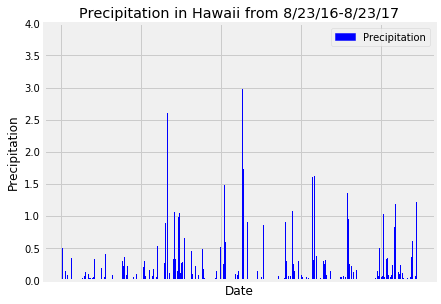

In [28]:
# Plot the precipitation for the past 12 months
x_axis = np.arange(len(prcp_df))
plt.bar(x_axis, prcp_df["Precipitation"], color='b', alpha=1, align="edge")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylim(0,4)
plt.tight_layout()
plt.title("Precipitation in Hawaii from 8/23/16-8/23/17")
plt.xlabel("Date")
plt.ylabel("Precipitation")
blue_patch = mpatches.Patch(color='blue', label='Precipitation')
plt.legend(handles=[blue_patch])
#plt.savefig('Prcp.png')
plt.show()


**STATION ANALYSIS**

In [17]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [18]:
columns=inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
#Design a query to calculate the total number of stations
station_results = session.query(Measurement.station, func.count(Measurement.tobs)).\
    filter(Measurement.tobs).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
station_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

**WAIHEE HAS THE MOST OBSERVATIONS**

In [24]:
#Design a query to retrieve the last 12 months of tobs data
tobs_results = session.query(Measurement.date, Measurement.tobs).\
     filter(Measurement.date >"2016-08-23").\
    filter(Measurement.station=="USC00519281").\
    order_by(Measurement.tobs.desc()).all()
#tobs_results

In [25]:
# put into dataframe
tobs_df = pd.DataFrame(tobs_results, columns=['Date','Temperature'])
tobs_df = tobs_df.sort_values(by=['Date'])
tobs_df.set_index('Date', inplace=True)
tobs_df.head()

,Temperature
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


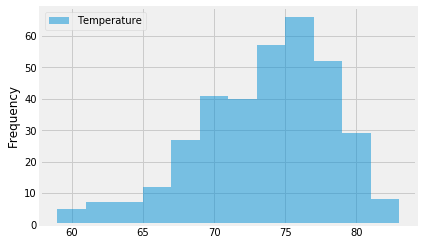

In [27]:
#plot the histogram
tobs_df.plot.hist(bins=12, alpha=0.5)
#plt.savefig('Tobs.png')
plt.show()